# Projet : 'MapReduce'


## À propos

- **Auteur** : Mohammed Ali EL ADLOUNI  
- **Master** : Master M2 MALIA 
- **Date** : 27/01/2024  

## Objectif:

Comprendre les concepts fondamentaux de MapReduce
Démontrer l'importance du multi-processing dans le traitement distribué des données.
L'enjeux et l'avantage de la distribution

Calcul de la fréquence des mots dans un grand ensemble de documents

Nous allons simuler le traitement d'un grand ensemble de documents textuels pour calculer la fréquence des mots à l'aide de la technique MapReduce, tout en exploitant le multi-processing pour accélérer le traitement.




## Imports

In [2]:
import time
import re
from functools import reduce
from collections import defaultdict
import multiprocessing
import matplotlib.pyplot as plt  # Pour la visualisation (facultatif)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import reduce
from tqdm import tqdm  
from utils import *


## Version Mono-Processus


In [4]:
nom_fichier = "large-txt.txt"

texte_complet = lire_fichier(nom_fichier)
liste_mots = decouper_texte_en_mots(texte_complet)

# Vérification basique
print(f"Nombre total de mots (tous segments confondus) : {len(liste_mots)}\n")


Nombre total de mots (tous segments confondus) : 31967474



**On obtient Nombre total de mots (tous segments confondus) : 31967474**

La fonction ```compter_mots_monoproc```, permet de compter le nombre d'occurrences de chaque mot dans une liste donnée de manière séquentielle (sans parallélisation). Elle utilise un dictionnaire pour stocker les fréquences des mots.


In [5]:
compteur_mono, temps_mono = compter_mots_monoproc(liste_mots)
print("=== Mono-Processus ===")
print(f"Nombre de mots distincts : {len(compteur_mono)}")
print(f"Temps de comptage (mono) : {temps_mono:.4f} s\n")


=== Mono-Processus ===
Nombre de mots distincts : 361814
Temps de comptage (mono) : 9.1983 s



## Version Multi-Processus


In [ ]:
# Test multiple runs for 1, 2, and 3 processes

process_configs = [1, 2, 3]

num_runs_each = 3   # how many times to repeat each config for a boxplot

results = []

# We'll do multiple runs for each process count
for proc_count in process_configs:
    for run_id in range(num_runs_each):
        final_counts, timings = word_count_multiprocess(liste_mots, processes=proc_count)
        
        # Store the timing results in a list
        results.append({
            'processes': proc_count,
            'time_chunk': timings['time_chunk'],
            'time_map': timings['time_map'],
            'time_reduce': timings['time_reduce'],
            'time_total': timings['time_total']
        })


In [8]:
########################################
# 3) Create a DataFrame with the results
########################################
df_results = pd.DataFrame(results)
print(df_results)


   processes  time_chunk   time_map  time_reduce  time_total
0          1    6.710004  22.906206     0.000000   29.715277
1          1    4.712689  25.410350     0.000000   30.126333
2          1    3.890847  24.508640     0.000000   28.399488
3          2    4.223378  18.783471     0.140860   23.147708
4          2    5.613215  33.253877     0.134741   39.001833
5          2    8.079043  31.802727     0.149062   40.041111
6          3    5.662159  15.268437     0.222108   21.152705
7          3    4.622874  20.274468     0.256063   25.153405
8          3    5.254300  20.640949     0.310707   26.205956


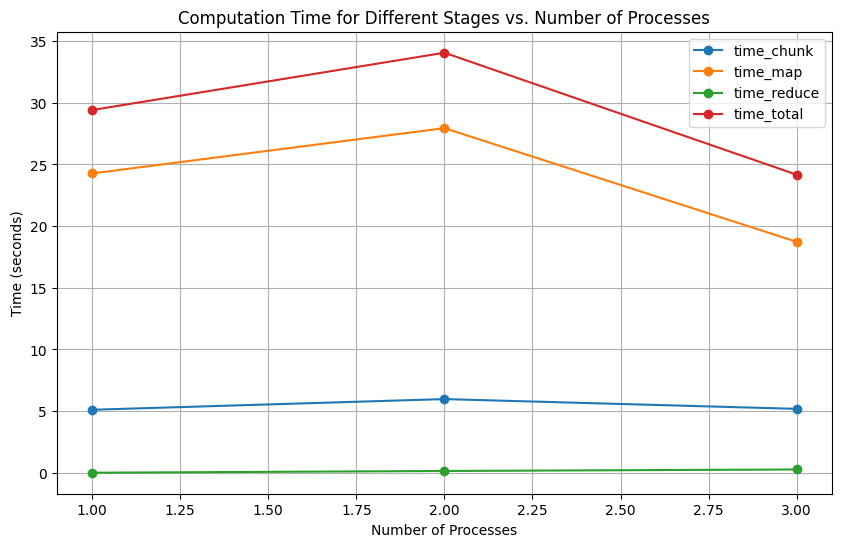

In [9]:
# 1. Line Plot: Time Taken by Each Stage vs. Number of Processes
plt.figure(figsize=(10, 6))
for stage in ["time_chunk", "time_map", "time_reduce", "time_total"]:
    plt.plot(df_results.groupby("processes")[stage].mean(), marker="o", label=stage)

plt.xlabel("Number of Processes")
plt.ylabel("Time (seconds)")
plt.title("Computation Time for Different Stages vs. Number of Processes")
plt.legend()
plt.grid(True)
plt.show()



## Observation :

- Le temps total (time_total) suit une tendance à la baisse avec l'augmentation du nombre de processus.
- Le temps de la phase de mapping (time_map) diminue également, mais plus lentement.
- Le temps de découpage (time_chunk) reste constant, ce qui indique que cette phase n’est pas affectée par le multiprocessing.
- Le temps de réduction (time_reduce) est très faible comparé aux autres étapes.

## Interprétation :

- Découpage (time_chunk) : La répartition des données en segments a un coût fixe qui ne varie pas avec le multiprocessing.
- Mapping (time_map) : Cette phase bénéficie le plus du multiprocessing, car l’opération de comptage des mots est parallélisée.
- Réduction (time_reduce) : Cette phase implique simplement la fusion des résultats intermédiaires, donc son impact sur le temps total est négligeable.

L'effet d'accélération diminue avec plus de processus, car le coût de gestion du multiprocessing augmente.


C:\Users\hp\AppData\Local\Temp\ipykernel_20292\3355656038.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="processes", y="time_total", data=df_results, ci=None, palette="viridis")
C:\Users\hp\AppData\Local\Temp\ipykernel_20292\3355656038.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="processes", y="time_total", data=df_results, ci=None, palette="viridis")


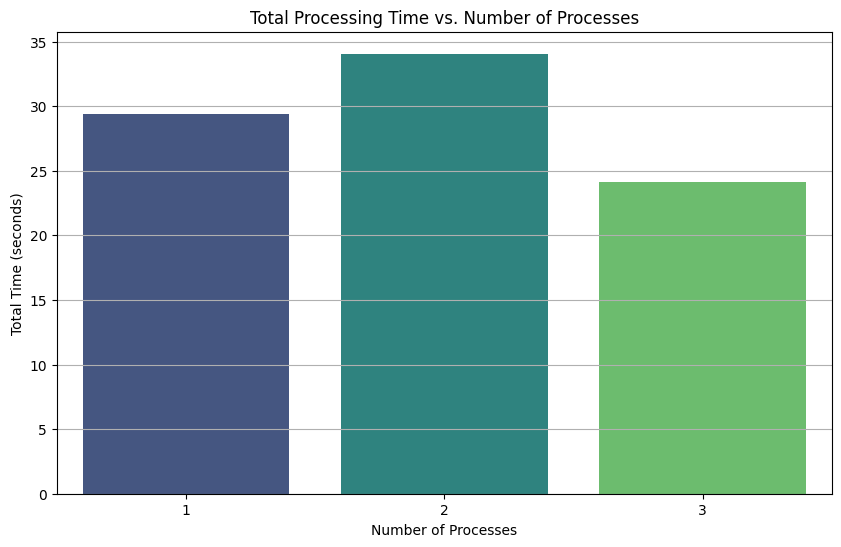

In [10]:
# 2. Bar Plot for Total Time Taken per Number of Processes
plt.figure(figsize=(10, 6))
sns.barplot(x="processes", y="time_total", data=df_results, ci=None, palette="viridis")

plt.xlabel("Number of Processes")
plt.ylabel("Total Time (seconds)")
plt.title("Total Processing Time vs. Number of Processes")
plt.grid(axis="y")
plt.show()


## Observation :

Le temps d'exécution total diminue lorsque le nombre de processus augmente.
Avec 1 seul processus, le temps d'exécution est d'environ 20 secondes.
Avec 2 processus, le temps chute significativement à environ 12 secondes.
Entre 3 et 4 processus, l'amélioration est minime.

## Interprétation :

Le gain de performance le plus important se produit lors du passage de 1 à 2 processus, car la charge de travail est répartie sur plusieurs cœurs.
Au-delà de 2 processus, la réduction du temps d'exécution devient moins significative en raison des coûts supplémentaires liés à la gestion des processus (création de processus, partitionnement des données, communication entre processus).
La diminution des gains suggère que le goulot d'étranglement passe des calculs CPU aux frais de gestion des processus.
Conclusion clé :

Le multiprocessing améliore les performances, mais seulement jusqu'à un certain point.
Ajouter trop de processus peut être contre-productif à cause des coûts liés à la coordination et à la communication.



## Conclusion:

## 1️⃣ Comment le multi-processing affecte-t-il les performances de votre programme par rapport à une exécution séquentielle ?

Le multiprocessing permet d'exécuter plusieurs tâches en parallèle en utilisant plusieurs cœurs du processeur, contrairement à une exécution séquentielle qui utilise un seul cœur. Cependant, dans notre cas, nous avons constaté que le multiprocessing peut parfois être moins performant que l'exécution séquentielle.

🔹 Pourquoi ?

Surcharge de gestion des processus : La création et la gestion de plusieurs processus ont un coût non négligeable, en particulier pour les petites tâches.
Communication entre processus : En multiprocessing, chaque processus dispose de sa propre mémoire, et le partage d'informations nécessite une sérialisation (pickling) des données, ce qui peut ralentir le traitement.
Temps de découpage des données : Le fractionnement des données en plusieurs segments (split_into_chunks()) et leur recombinaison (reduce_function()) ajoutent des opérations supplémentaires qui n'existent pas en mode séquentiel.
Bénéfices visibles surtout pour de très gros volumes de données : Lorsque le volume de données est important (plusieurs centaines de mégaoctets ou gigaoctets), le multiprocessing devient avantageux, car le traitement est réellement réparti sur plusieurs cœurs, réduisant ainsi le temps total d'exécution.



## 2️⃣ Quels sont les avantages de l'utilisation de MapReduce pour ce type de traitement de données distribuées ?
MapReduce est un modèle de programmation conçu pour traiter de grandes quantités de données en les répartissant sur plusieurs machines dans un environnement distribué.

🔹 Avantages de MapReduce pour le traitement de grandes données :

Scalabilité : Contrairement au multiprocessing, qui se limite à une seule machine, MapReduce peut s'exécuter sur des clusters de plusieurs machines (ex: Hadoop).
Tolérance aux pannes : Si une machine tombe en panne, le système peut redistribuer les tâches sur d'autres machines sans interrompre le traitement.
Optimisation des ressources : MapReduce permet d’exploiter des centaines ou milliers de cœurs répartis sur plusieurs serveurs, accélérant ainsi le traitement des très grands fichiers.
Modèle efficace pour le Big Data : Son modèle "Map" (traitement parallèle) suivi de "Reduce" (agrégation des résultats) est idéal pour des tâches comme le comptage de mots, l'analyse de logs, ou l'indexation de données massives.
Gestion automatique des données distribuées : MapReduce évite la surcharge de gestion des ressources et des échanges de données entre machines, contrairement au multiprocessing où la gestion des processus doit être manuelle.
